In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("insurance.csv")
print("Number of rows and columns in the data:",df.shape)
print(df.head)

Number of rows and columns in the data: (1338, 7)
<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


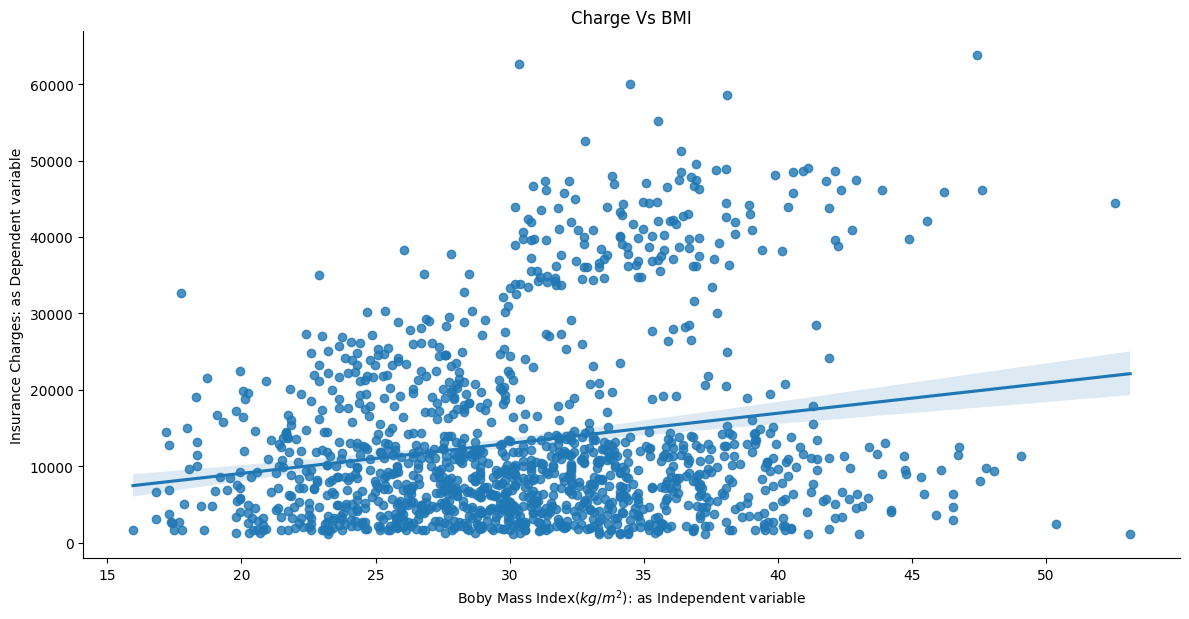

In [4]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

EDA:

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing value in the dataset')

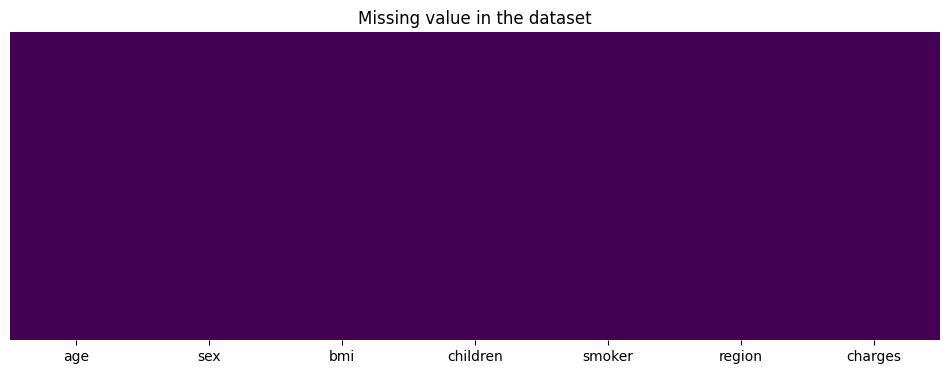

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

<Axes: >

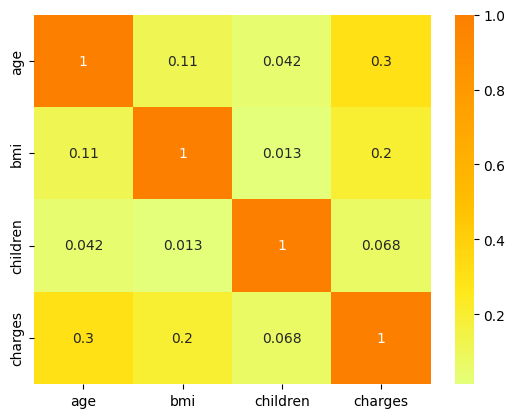

In [10]:
numeric_df = df.select_dtypes(include=[float, int])
corr = numeric_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

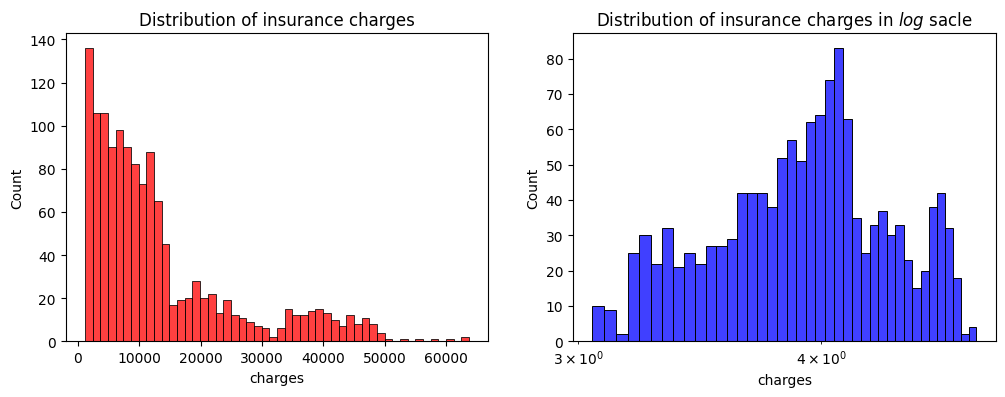

In [14]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

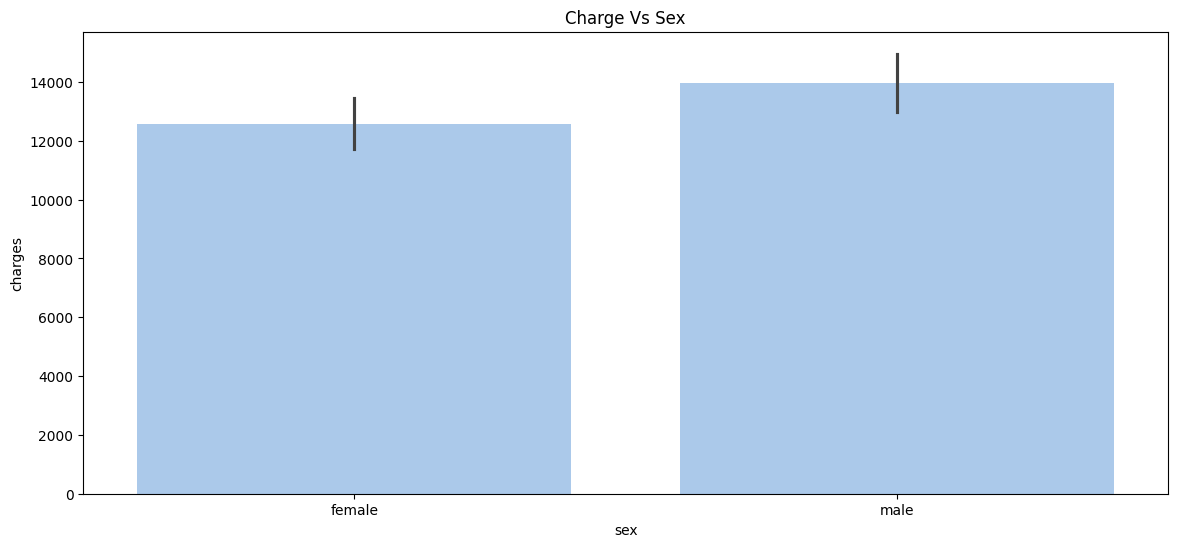

In [21]:
f = plt.figure(figsize=(14, 6))
ax = f.add_subplot(111)
sns.set_palette('pastel')
sns.barplot(x=df['sex'], y=df['charges'], ax=ax)
ax.set_title('Charge Vs Sex')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_18384\3263356476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18384\3263356476.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)


Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

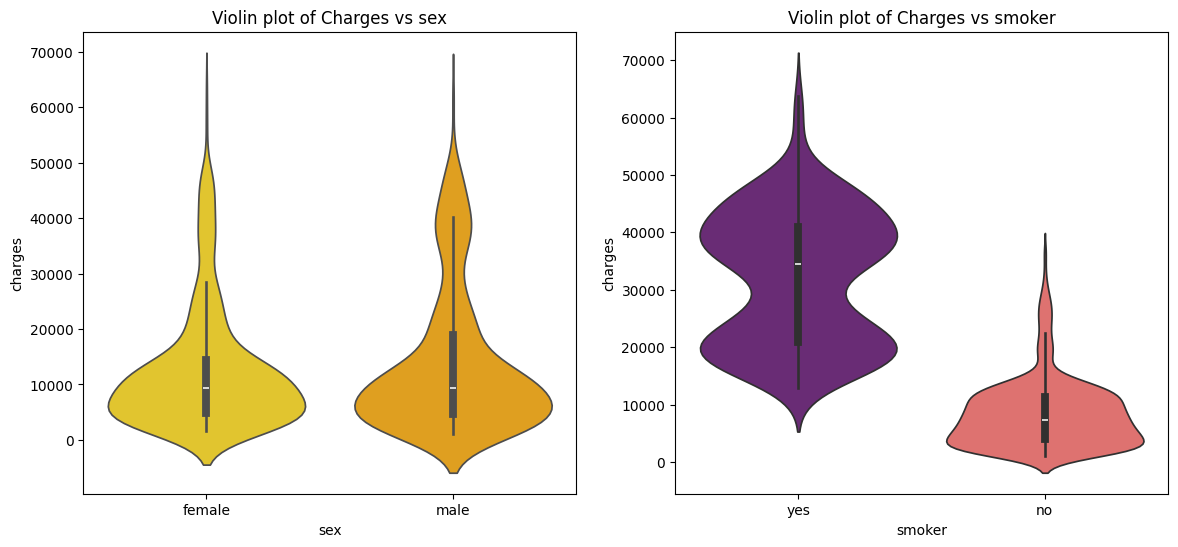

In [22]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Data Pre-Processing

In [24]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)


Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


Train-Test-Split


In [26]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [27]:
import statsmodels.api as sm 
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const           -11738.954855
age                246.272603
bmi                347.988088
OHE_male          -127.955178
OHE_1              321.846883
OHE_2             1476.269020
OHE_3             1198.109156
OHE_4             3767.409106
OHE_5             1964.399228
OHE_yes          24252.366362
OHE_northwest     -551.151944
OHE_southeast    -1180.010754
OHE_southwest    -1512.956743
dtype: float64

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     240.8
Date:                Tue, 21 May 2024   Prob (F-statistic):          2.47e-274
Time:                        14:46:23   Log-Likelihood:                -9484.4
No. Observations:                 936   AIC:                         1.899e+04
Df Residuals:                     923   BIC:                         1.906e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.174e+04   1196.154     -9.814

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
print(sk_theta)

[-11738.954855430964, 246.27260255058226, 347.98808787938003, -127.9551782493216, 321.84688294874604, 1476.2690201894475, 1198.109155838499, 3767.409105709882, 1964.3992282646539, 24252.366361564887, -551.1519437465296, -1180.0107542019193, -1512.956743404225]


In [39]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)


X_test_ols=sm.add_constant(X_test)
# Predictions
y_pred_ols = lr.predict(X_test_ols)
y_pred_sklearn = lin_reg_model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
# Calculate metrics for comparison
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_ols = r2_score(y_test, y_pred_ols)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"OLS Model MSE: {mse_ols}")
print(f"scikit-learn Model MSE: {mse_sklearn}")
print(f"OLS Model R-squared: {r2_ols}")
print(f"scikit-learn Model R-squared: {r2_sklearn}")

results_df = pd.DataFrame({
    'Actual': y_test,
    'OLS Predictions': y_pred_ols,
    'Linear Regression Predictions': y_pred_sklearn
})

print(results_df.head())

OLS Model MSE: 35152074.799860306
scikit-learn Model MSE: 35152074.79986035
OLS Model R-squared: 0.7305284299807454
scikit-learn Model R-squared: 0.7305284299807451
          Actual  OLS Predictions  Linear Regression Predictions
918  13041.92100     11583.981235                   11583.981235
755   5031.26955      6863.940355                    6863.940355
207  20984.09360     32134.455995                   32134.455995
520  25656.57526     10095.629356                   10095.629356
695   3201.24515      8096.882179                    8096.882179


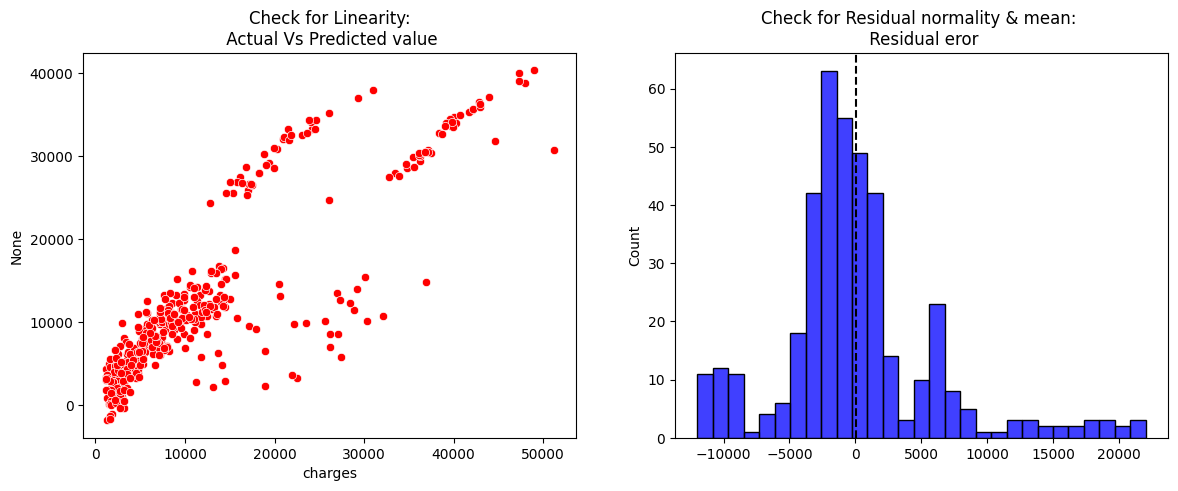

In [38]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_ols,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_ols),ax=ax,color='b')
ax.axvline((y_test - y_pred_ols).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')